<a href="https://colab.research.google.com/github/Jithendrasa/heart-disease-prediction/blob/main/heart_disease_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/heartdisease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


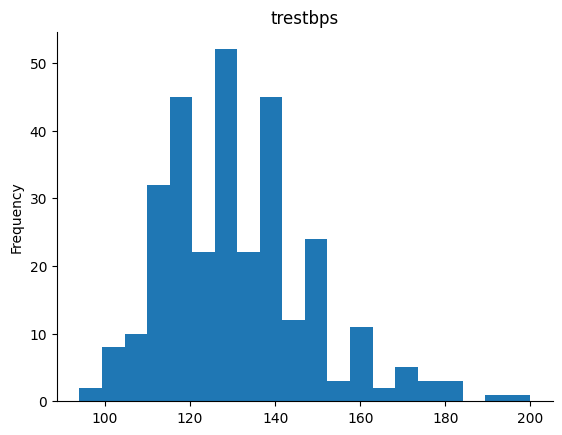

In [4]:
# @title trestbps

from matplotlib import pyplot as plt
df['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

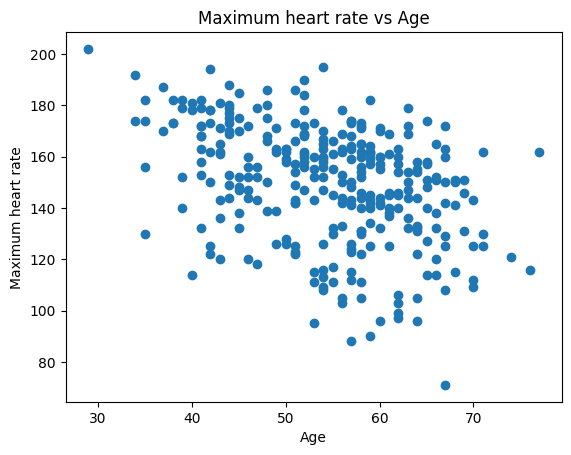

In [5]:
# @title Maximum heart rate vs Age

import matplotlib.pyplot as plt

# Create the scatter plot
plt.scatter(df['age'], df['thalach'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Maximum heart rate')
_ = plt.title('Maximum heart rate vs Age')


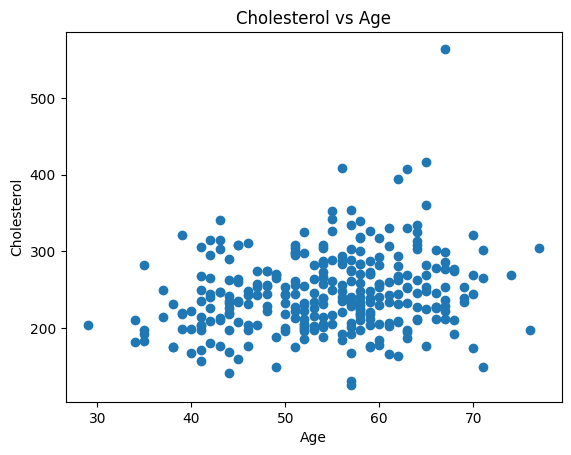

In [6]:
# @title Cholesterol vs Age

import matplotlib.pyplot as plt
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
_ = plt.title('Cholesterol vs Age')

<Axes: ylabel='Frequency'>

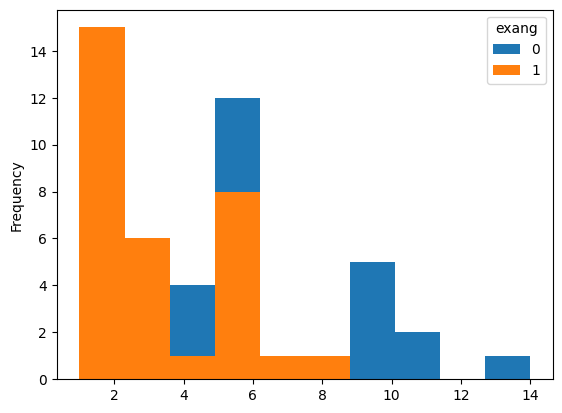

In [7]:
# @title Chest pain frequency by age group

df.groupby(['age'])['exang'].value_counts().unstack().plot(kind='hist')

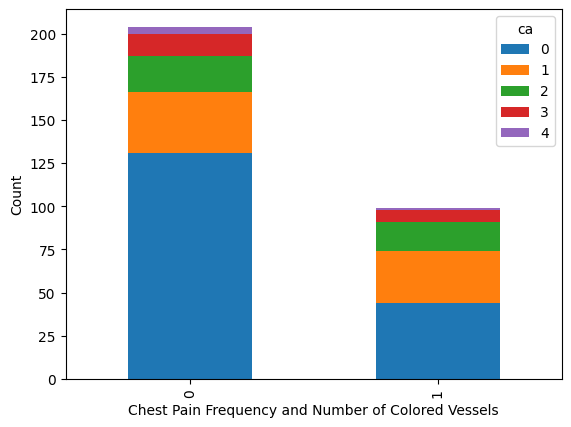

In [8]:
# @title Chest Pain Frequency vs Number of Colored Vessels

import matplotlib.pyplot as plt
df.groupby(['exang', 'ca']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Chest Pain Frequency and Number of Colored Vessels')
_ = plt.ylabel('Count')

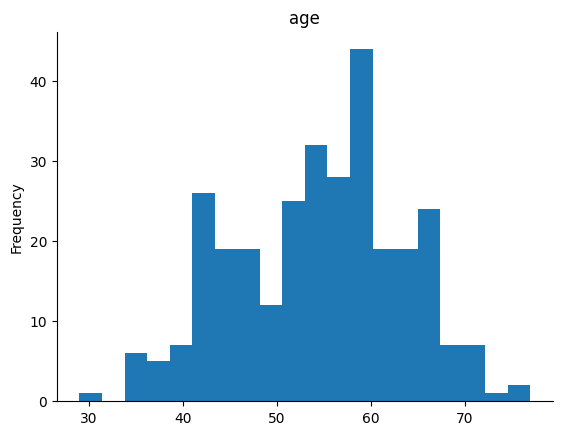

In [9]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.shape

(303, 14)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


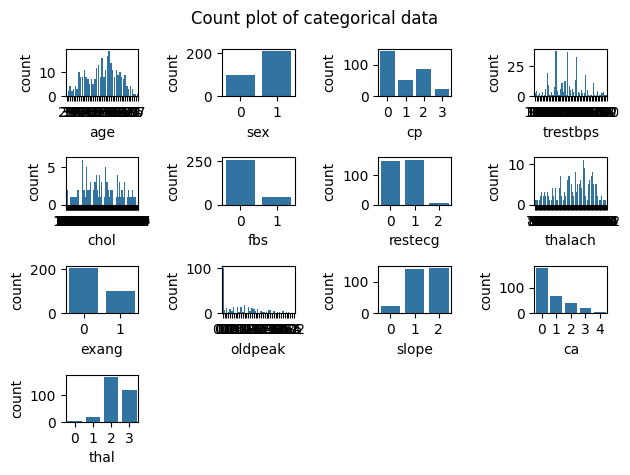

In [15]:
cati = ['age'	,'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal']
try:
    plt.suptitle("Count plot of categorical data")
    for i in range(0,len(cati)):
        plt.subplot(4,4,i+1)
        sns.countplot(x=df[cati[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: xlabel='sex'>

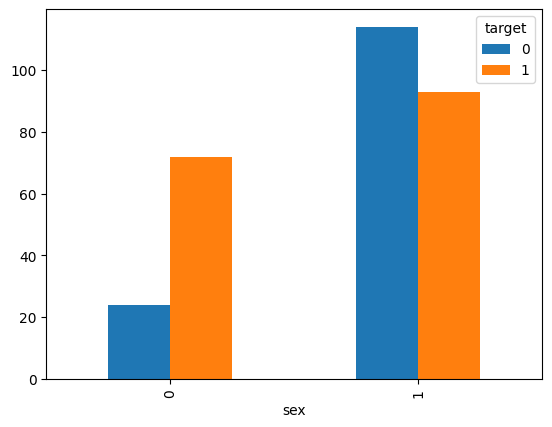

In [16]:
gender = pd.crosstab(df["sex"],df["target"])
gender.plot(kind="bar")

<Axes: xlabel='age'>

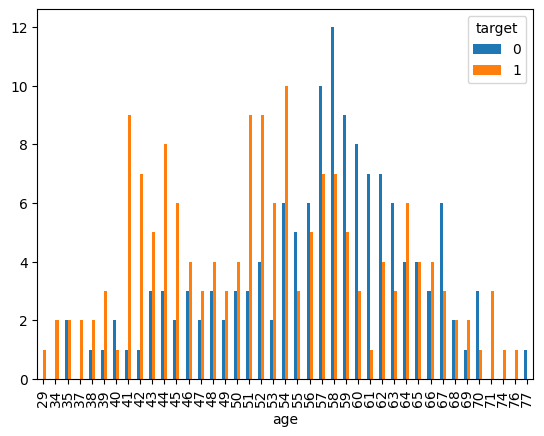

In [17]:
gender = pd.crosstab(df["age"],df["target"])
gender.plot(kind="bar")

<Axes: ylabel='target'>

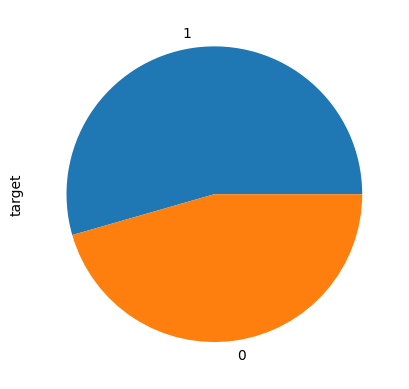

In [18]:
df["target"].value_counts().plot.pie()

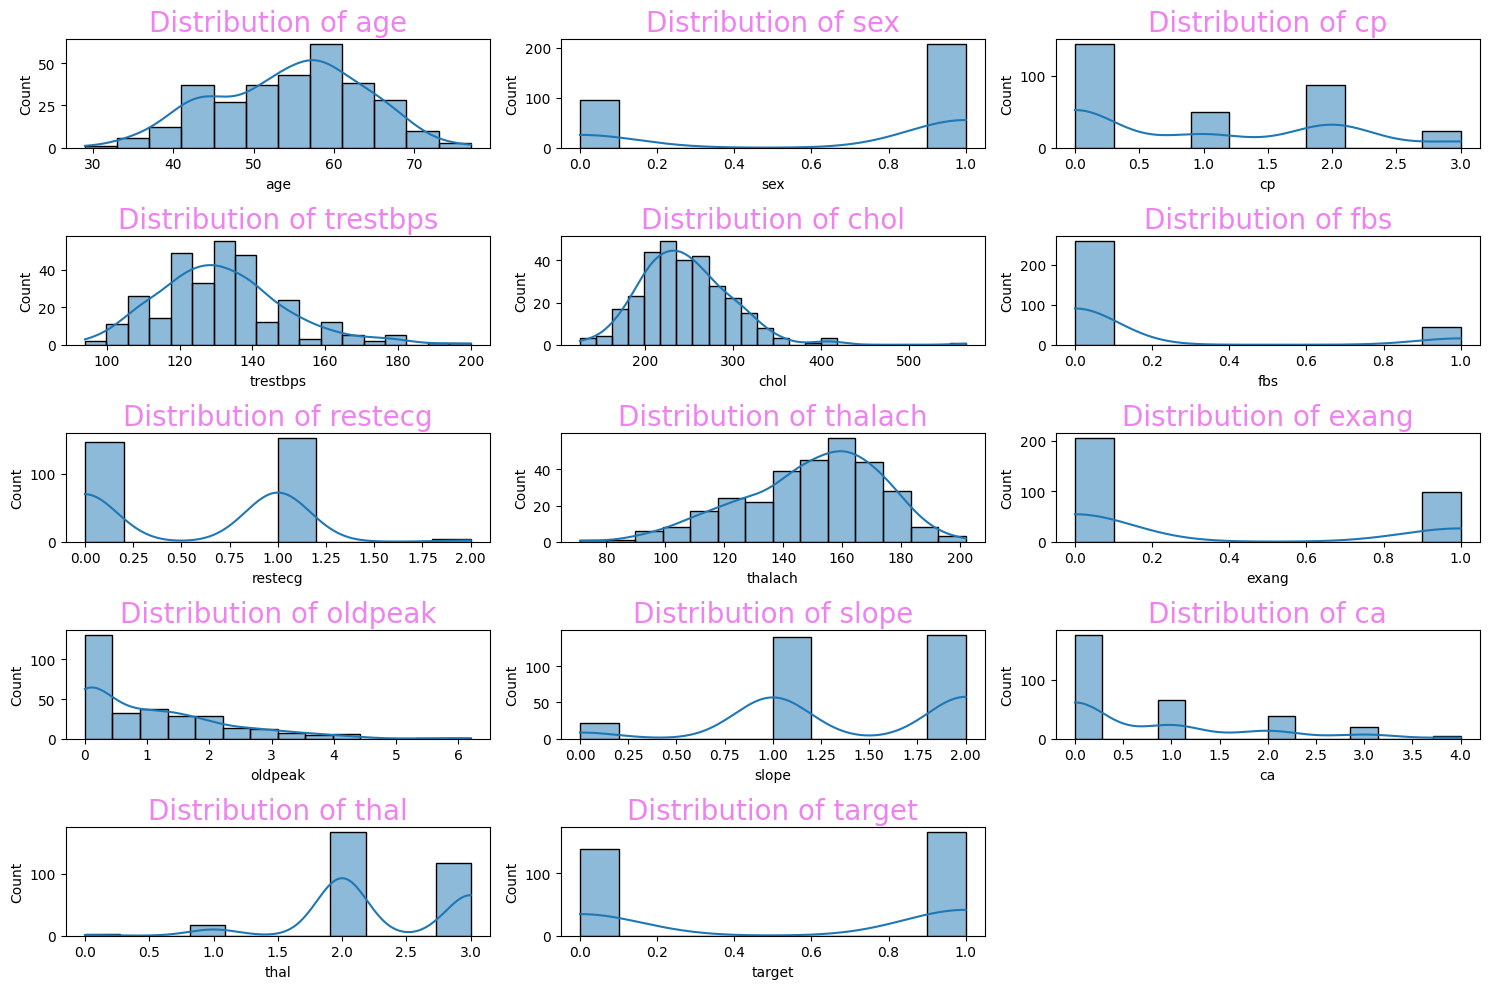

In [19]:
# Check the number of columns in the dataframe
num_cols = len(df.select_dtypes(exclude=['object']).columns)

# Modify the subplot layout to accommodate the number of columns
plt.figure(figsize=(15,10))
for i,col in enumerate(df.select_dtypes(exclude=['object']).columns,1):
    plt.subplot(num_cols//3 + 1,3,i)
    plt.title(f"Distribution of {col}",fontdict= {'fontsize':20,'color':'violet'})
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

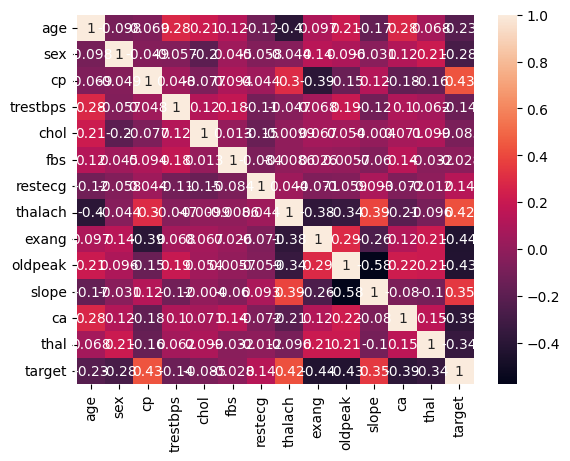

In [20]:
# Correlation With arget colums
sns.heatmap(df.corr(),annot=True)
plt.show()

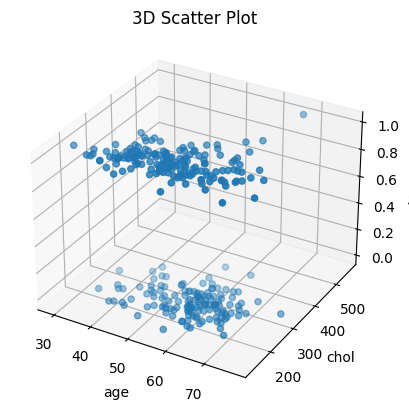

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df has columns 'x', 'y', and 'z'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['chol'], df['target'])
ax.set_xlabel('age')
ax.set_ylabel('chol')
ax.set_zlabel('target')
ax.set_title('3D Scatter Plot')
plt.show()


In [22]:
x = df.drop(columns=['target']) # spliting the feature variables into x.
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y = df['target']  # splitting the target variable into y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# spliting the data into training data ,testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)


In [25]:
x_train # x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3


In [26]:
x_test  # x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
121,59,1,0,138,271,0,0,182,0,0.0,2,0,2


In [27]:
y_train  # y_train


6      1
274    0
254    0
74     1
231    0
      ..
277    0
256    0
131    1
249    0
152    1
Name: target, Length: 242, dtype: int64

In [28]:
y_test  # y_test

245    0
162    1
10     1
161    1
73     1
      ..
102    1
83     1
259    0
121    1
61     1
Name: target, Length: 61, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()   # scaling the dataset
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [31]:
# applying the logistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [32]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[15  6]
 [ 2 38]]
accuracy score 0.8688524590163934
precision score  0.8636363636363636
recall score  0.95
f1 score  0.9047619047619048


In [33]:
# applying Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [34]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for decision tree model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[15  6]
 [ 9 31]]
accuracy score 0.7540983606557377
precision score  0.8378378378378378
recall score  0.775
f1 score  0.8051948051948051


In [35]:
# applying random forest model
from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()
rdf = rdf.fit(x_train,y_train)
y_pred = rdf.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [36]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for radom forest model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)


confusion matrix [[15  6]
 [ 5 35]]
accuracy score 0.819672131147541
precision score  0.8536585365853658
recall score  0.875
f1 score  0.8641975308641976


In [37]:
from sklearn.svm import SVC

svm = SVC()
svm = svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [38]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for svm model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[12  9]
 [ 6 34]]
accuracy score 0.7540983606557377
precision score  0.7906976744186046
recall score  0.85
f1 score  0.8192771084337349


In [39]:
# applying Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nvb = GaussianNB()

nvb = nvb.fit(x_train,y_train)
y_pred = nvb.predict(x_test)
y_pred


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [40]:
# finding the confusion matrix,accuracy score , precision score,recall score and f1 score values for navie bayes model.
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('confusion matrix' , cm)
acc = metrics.accuracy_score(y_test,y_pred)
print("accuracy score" ,acc)
pre = metrics.precision_score(y_test,y_pred)
print("precision score " ,pre)
re = metrics.recall_score(y_test,y_pred)
print("recall score ",re)
f1 = metrics.f1_score(y_test,y_pred)
print("f1 score " ,f1)

confusion matrix [[15  6]
 [ 3 37]]
accuracy score 0.8524590163934426
precision score  0.8604651162790697
recall score  0.925
f1 score  0.891566265060241


In [41]:
pred = rdf.predict([[57,	0,	0,	140,	241,	0,	1,	123,	1,	0.2,	1,	0,	3		]]) # testing the model with some values.
pred

array([0])

In [42]:
pred = lr.predict([[57,	0,	0,	140,	241,	0,	1,	123,	1,	0.2,	1,	0,	3		]]) # testing the model with some values.
pred

array([0])

In [43]:
import pickle # saving the model in the pickle file.
pickle.dump(rdf,open('sensor.pkl','wb'))

In [44]:
import pickle # saving the model in the pickle file.
pickle.dump(lr,open('aim.pkl','wb'))

1)age
2)sex
3)chest pain type (4 values)
4)resting blood pressure
5)serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7)resting electrocardiographic results (values 0,1,2)
8)maximum heart rate achieved
9)exercise induced angina
10)oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
11)thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.